# Class activity: Application of descriptive statistics using Python

### Getting archived weather data for US station data 

This script defines a function that downloads daily weather data from weather stations from the Global Historical Climate Network - Daily(GHCND).
The data server that allows us a convenient access to the daily data is located at the Applied Climate Information System (ACIS).  [http://data.rcc-acis.org](http://data.rcc-acis.org)



In the code below we have selected the station Albany Airport (KALB). The GHCN station idenifier is 

__'USW00014735'__

We can get for example: 
- avgt: daily average temperature (F)
- tmin: daily minimum temperature (F)
- tmax: daily maximum temperature (F)
---


## Code development

We copy and paste the import statements and the function definition from unit4/get_ghcn_daily_from_server.ipynb


In [125]:
import numpy as np
import matplotlib.pyplot as plt
# new: you can change the style of the plots by choosing from 
# the matplotlib styles. More help can be found through a quick google search
import matplotlib as mpl
mpl.style.use('ggplot') #'classic' 


In [126]:
# this cell contains all that is needed for defining
# the data access function get_stationdata
import urllib3
import json
import datetime as dt
#########################################################################################################
# defining a function to allow us to make more than just one specific data request
# it allows flexibilty in terms of station, variable, start and end year
# It first creates the http-string and uses the urllib3 functions to transmit the request to the server
# Then it receives the data in the JSON text format and converts it into a nested list object
# That's where we had to put some work in to extract the dates and data values and put them into lists
# two lists are returned, one with the dates (NEW object type 'datetime'!) and teh numerical values.
#########################################################################################################
def get_stationdata(sid,var='avgt',startyear=2017,endyear=2017):
    """Sends request to regional climate center ACIS and gets daily data for one station.
    Input parameters: 
        sid (string): a station id
        var (string): a variable name (e.g. 'avgt', 'mint', 'maxt')
    Optional parameters:
        startyear and endyear (integers): for selecting the year range e.g. 1950 and 2017
    
    Returned objects:
        list with dates (datetime objects)
        list with the data 
    """    
    # the http address of the data server
    host="http://data.rcc-acis.org/StnData"
    # forming the query string for the host server
    sdate='&sdate='+str(startyear)+'-01-1'
    edate='&edate='+str(endyear)+'-12-31'
    query='?sid='+sid+'&'+sdate+'&'+edate+'&interval=dly&'\
    +'elems='+var
    # try to connect and to get the requested data
    # in format ready to export to a csv file
    print (">send data request to "+host+query)
    print ("> still waiting for response ...")
    try:
        http= urllib3.PoolManager()
        response = http.request('GET',host+query)
        # convert json-string into dictionary
        content =  json.loads(response.data.decode('utf-8'))
        meta=content['meta']
        data=content['data']
        time=[]
        value=[]
        for item in data:
            #print (item)
            time.append(dt.datetime.strptime(item[0],"%Y-%m-%d"))
            if (item[1]!='M'):
                value.append(float(item[1]))
            else:
                value.append(np.NAN)
    except Exception as e:
        print ("error occurred:", e)
        return
    print(">... done")
    return time,value

In [127]:
x,y=get_stationdata("USW00014735",'avgt',startyear=1950,endyear=2018)

>send data request to http://data.rcc-acis.org/StnData?sid=USW00014735&&sdate=1950-01-1&&edate=2018-12-31&interval=dly&elems=avgt
> still waiting for response ...
>... done


<p style="color:gold;background-color:purple;font-size:130%">
    <BR>Task 1: Working with Albany Airport daily temperature data<BR><BR>
</p>

### Create a histogram of the daily Albany temperature data using all Feb 28th days from 1950 to 2018

**Step 1**: Subsample the data and put all February 28th dates and temperatures into lists. Then once the loop is finished and the lists are complete, I convert the lists into numpy arrays. They work best for our data analysis.

In [129]:
# remember x and y are lists with the all dates and all temperature, respectively 
i=0
date=None
xlist=[] # use to store the dates
ylist=[] # use to store the temperatures
# storing years, month and day as numbers
yearlist =[]
monthlist = []
daylist =[]
while i < len(x):
    date=x[i]
    # we can combine our two if statements into one in this case
    if date.month == 2 and date.day ==28: 
        xlist.append(date) # date is x[i]
        yearlist.append(date.year)
        monthlist.append(date.month)
        daylist.append(date.day)
        ylist.append(y[i])
    i=i+1
    # end of loop
    
#####################################
# Convert all lists into numpy arrays
######################################
y1=np.array(ylist)
year=np.array(yearlist)
month=np.array(monthlist)
day=np.array(daylist)

** Step 2: Show the data as a histogram. 

The function _plt.hist_ is given a numpy array with our temperature sample.
You can choose the number of bins for the histogram, or leave the keyword parameter
_bin_ undefined. Then the function will adjust the bin number to the data.
The choice of bins is always a trade-off between the resolution along the x-axis (the sample space) and the robustness of the individual events counts in each bin (bar length).



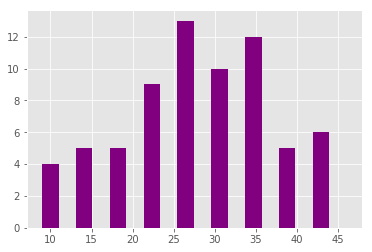

In [130]:
plt.hist(y1,bins=9,width=2,color="purple")
plt.show()

### 1.2. For the same data create a box-whisker plot

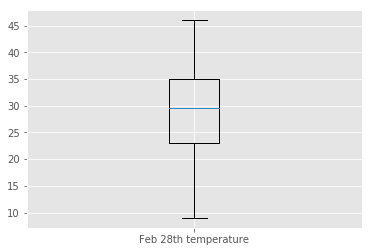

In [131]:

plt.boxplot(y1)
plt.xticks([1],["Feb 28th temperature"])
plt.show()




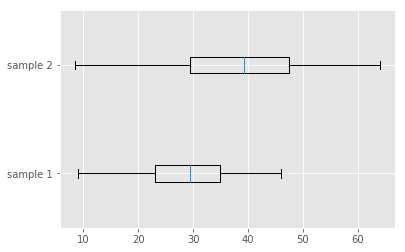

In [133]:
# You can create also horizontal Box-whisker plots
# With some more effort you can also place several box-whisker 
# next to each other: The trick is to form a list with two or more 
# numpy arrays.

# For more options (e.g. how to fill the IQR box with color)
# see https://matplotlib.org/gallery/statistics/boxplot_color.html
y2=1.5*y1-5
plt.boxplot([y1,y2],vert=False)
plt.yticks([1,2],["sample 1","sample 2"])
plt.show()


### Summary statistics for the Feb 28th sample

In [134]:
ymean=np.mean(y1)
ystd=np.std(y1)
ymin=np.min(y1)
ymax=np.max(y1)

unit="F"
# note I use here a special purpose string 
print("Summary statistics for the temperature sample:")
print(50*"-")
print("mean    "+str(round(ymean,2))+unit)
print("stddev  "+str(round(ystd,2))+unit)
print("min     "+str(round(ymin,2))+unit)
print("max     "+str(round(ymax,2))+unit)
print(50*"-")

imin=np.argmin(y1)
imax=np.argmax(y1)

print ("Year with minimum temperature: "+str(year[imin]))
print ("Year with maximum temperature: "+str(year[imax]))
print (50*"-")
irank=np.argsort(y1)
print ("years sorted by temperature:")
k=0
while k<len(y1):
    print(k,year[irank[k]],y1[irank[k]])
    k=k+1
print(14*"=")
print("We see that we must be careful with the np.argmin, np.argmax functions.")
print("Ties in the maximum value occurred 2017, 2018.")

Summary statistics for the temperature sample:
--------------------------------------------------
mean    28.64F
stddev  8.97F
min     9.0F
max     46.0F
--------------------------------------------------
Year with minimum temperature: 1950
Year with maximum temperature: 2017
--------------------------------------------------
years sorted by temperature:
0 1950 9.0
1 2014 10.5
2 2008 11.0
3 1994 12.5
4 1964 13.5
5 2015 14.0
6 1980 16.0
7 1993 16.5
8 2006 17.0
9 1978 18.0
10 1973 18.0
11 1982 19.0
12 1963 20.0
13 1957 20.5
14 2001 21.5
15 1956 22.0
16 2003 22.5
17 1990 23.0
18 1986 23.0
19 2005 23.5
20 1953 24.0
21 1985 24.5
22 2009 25.0
23 1970 25.5
24 1969 25.5
25 1989 26.0
26 1988 26.0
27 2002 26.0
28 1987 26.5
29 1960 28.0
30 1981 28.5
31 1991 29.0
32 1952 29.5
33 2004 29.5
34 1967 29.5
35 1968 29.5
36 1995 30.0
37 1965 30.0
38 1992 30.0
39 1959 30.0
40 2007 31.0
41 1966 31.0
42 1951 31.5
43 1975 31.5
44 1999 31.5
45 1984 32.0
46 1997 34.0
47 1977 34.0
48 1962 34.5
49 1961 34.5
50 2

<p style="color:gold;background-color:purple;font-size:130%">
    <BR>Task 2: Quantitative statistics with numpy<BR><BR>


### 2.1 Now copy your code into the cell below and modify your code: Select all daily data from Feburary months 1950-2018 and apply the numpy functions:


- _np.mean_ 
- _np.std_
- _np.min_
- _np.max_


In [135]:
i=0
date=None
xlist=[] # use to store the dates
ylist=[] # use to store the temperatures
# storing years, month and day as numbers
yearlist =[]
monthlist = []
daylist =[]
while i < len(x):
    date=x[i]
    if date.month == 2: 
        xlist.append(date) # date is x[i]
        yearlist.append(date.year)
        monthlist.append(date.month)
        daylist.append(date.day)
        ylist.append(y[i])
    i=i+1
    # end of loop
y1=np.array(ylist)
ymean=np.mean(y1)
ystd=np.std(y1)
ymin=np.min(y1)
ymax=np.max(y1)

unit="F"
# note I use here a special purpose string 
print("Summary statistics for the temperature sample:")
print(50*"-")
print("mean    "+str(round(ymean,2))+unit)
print("stddev  "+str(round(ystd,2))+unit)
print("min     "+str(round(ymin,2))+unit)
print("max     "+str(round(ymax,2))+unit)
print(50*"-")

Summary statistics for the temperature sample:
--------------------------------------------------
mean    24.93F
stddev  10.6F
min     -6.5F
max     57.5F
--------------------------------------------------


<p style="color:gold;background-color:purple;font-size:130%">
    <BR>Task 3: Apply your Python skills and create a climatology plot<BR><BR>
        
Think about a way to produce a summary graph for the Albany temperature (min, max and daily mean temperatures) climatology using the years 1981-2010.

The figure below has more information in it. We want to make a cleaner version just for temperatures.

In [ ]:
# create a loop so we can process all 12 month

In [138]:
# remember x and y are lists with the all dates and all temperature, respectively 
monmean= [] # store all monthly means in this list
monstd= [] # store all monthly standard deviations
monmin= [] # store all monthly minima
monmax = [] # store all monthly maxima
monindex = [] # store the month index number
for m in [1,2,3,4,5,6,7,8,9,10,11,12]:
    i=0
    date=None
    xlist=[] # use to store the dates
    ylist=[] # use to store the temperatures
    # storing years, month and day as numbers
    yearlist =[]
    monthlist = []
    daylist =[] 
    while i < len(x):
        date=x[i]
        if date.month == m and date.year>=1981 and date.year<=2010: 
            xlist.append(date) # date is x[i]
            yearlist.append(date.year)
            monthlist.append(date.month)
            daylist.append(date.day)
            ylist.append(y[i])
        i=i+1
        # end of loop over temperature sample
    y1=np.array(ylist)
    year=np.array(yearlist)
    month=np.array(monthlist)
    day=np.array(daylist)
    monmean.append(np.mean(y1))
    monstd.append(np.std(y1))
    monmin.append(np.min(y1))
    monmax.append(np.max(y1))
    monindex.append(m)
    # end loop over month

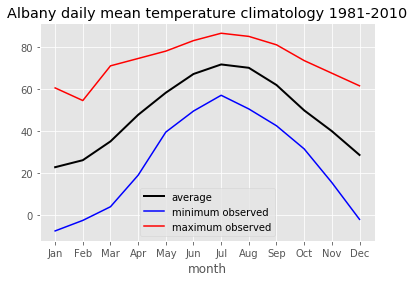

check year range:  1981 2010


In [142]:
plt.plot(monindex,monmean,color='black',linewidth=2,label='average')
plt.plot(monindex,monmin,color='blue',label='minimum observed')
plt.plot(monindex,monmax,color='red',label='maximum observed')
plt.xlabel("month")
plt.title("Albany daily mean temperature climatology 1981-2010")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun',
                                         'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.show()
print("check year range: ",np.min(year),np.max(year))

### The data table one could fill out by hand. But we have already the plot as summary. So, that's sufficient. Below is a code that prints the numbers for us, though.

Table 1: Summary statistic for all February temperatures 1981-2010

| Month  | Mean |  Std |  Min  |  Max  | 
|--------|------|------|-------|-------|
| Feb    | 26.13| 10.05|  -2.5 |54.5   |



In [144]:
m=0
monlabel=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print ("| Month | mean | stddev | min | max |")
while m<len(monlabel):
    line=monlabel[m]+"       "+str(round(monmean[m],2))+"   "+str(round(monstd[m],2))+\
    "   "+str(round(monmin[m],2))+" "+str(round(monmax[m],2))
    print (line)
    m=m+1


| Month | mean | stddev | min | max |
Jan       22.8   11.7   -7.5 60.5
Feb       26.13   10.05   -2.5 54.5
Mar       35.08   10.06   4.0 71.0
Apr       47.71   8.68   19.0 74.5
May       58.23   7.51   39.5 78.0
Jun       67.12   6.51   49.5 83.0
Jul       71.66   5.3   57.0 86.5
Aug       70.07   5.84   50.5 85.0
Sep       61.88   7.17   42.5 81.0
Oct       49.82   7.82   31.5 73.5
Nov       39.95   8.58   15.5 67.5
Dec       28.62   9.65   -2.0 61.5


Almost acceptable the formatting. We applied the function _round_ above
and converted the resulting number into strings.

For those of you who want always the same number of decimals for a clean table layout, see below.


In [145]:
m=0
monlabel=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print ("Month     mean    stddev    min     max")
while m<len(monlabel):
    # if code lines get too long you can use the \ at the end and continue the line
    # o nthe next line
    print (monlabel[m]+"     %7.2f %7.2f %7.2f %7.2f" %(round(monmean[m],2),\
                                                  round(monstd[m],2),\
                                                  round(monmin[m],2),\
                                                  round(monmax[m],2)))
    m=m+1

Month     mean    stddev    min     max
Jan       22.80   11.70   -7.50   60.50
Feb       26.13   10.05   -2.50   54.50
Mar       35.08   10.06    4.00   71.00
Apr       47.71    8.68   19.00   74.50
May       58.23    7.51   39.50   78.00
Jun       67.12    6.51   49.50   83.00
Jul       71.66    5.30   57.00   86.50
Aug       70.07    5.84   50.50   85.00
Sep       61.88    7.17   42.50   81.00
Oct       49.82    7.82   31.50   73.50
Nov       39.95    8.58   15.50   67.50
Dec       28.62    9.65   -2.00   61.50


---
## Summary:

This notebook solved a few simple plotting tasks, and a more complex problem in the end.
We see that it is possible to construct Python code with loops, and use the list-appending to prepare our sample data for the statistical data analysis. 

We make use of the concepts and methods that we have learned before: 
nested loops and if statements for flow control. 

So far we stored our data in 1-dimensional arrays. The data table in the end is a 2-dimension data table. Such information can be stored in 2-dimensional arrays. These 2-dimensional arrays will be introduced in the upcoming units.

One can format numbers in the print function using special string components such as '%f7.2'. This gives us the best control on how the numbers will be printed.
The general syntax is given below: Two flot numbers with two digits and a total string length of 7 characters.

*print("test %7.2f  and %7.2f" % ( -12.1234, 1/12.0)*



### Further References:
- [GHCND](https://www.ncdc.noaa.gov/ghcn-daily-description)
- FTP site with station ids etc: ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/